Тестовое MedStat Solutions
1.	Загрузить и описать полученный набор данных; +
2.	Провести предобработку данных; +
3.	Провести графический и статистический анализ;+
4.	Выдвинуть несколько гипотез и провести соответствующие статистические тесты;+
5.	Построить модель бинарной классификации;+
6.	Вывести важность признаков в графическом представлении.


In [68]:
#1.	Загрузить и описать полученный набор данных;
# замечание: описывать датасет на данном этапе не хочется - сначала нужно почистить, потом можно описывать
import pandas as pd
df = pd.read_csv("C:/Users/Алексей/OneDrive/Рабочий стол/arbitrage_project/test_data.csv")
#2.	Провести предобработку данных;
df = df.dropna().drop_duplicates()
df = df.reset_index().drop(columns="index")
df


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
298,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
299,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
300,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


вывод: сократили датасет в х3 - что прекрасно, можно описывать

In [ ]:
#"age": дискретная случайная величина: 29-77 - normal distribution?
#"trestbps": дискретная случайная величина: 94-200 - long tail?
#"chol": дискретная случайная величина: 126-564 - long tail?
#"thalach": дискретная случайная величина: 71-202 - long tail?
#"oldpeak": дискретная случайная величина: 0-6 - long tail?
#"sex": счетная случайная величина: 0-1
#"cp": счетная случайная величина: 0-1-2-3
#"fbs": счетная случайная величина: 0-1
#"restecg": счетная случайная величина: 0-1-2
#"exang": счетная случайная величина: 0-1
#"slope": счетная случайная величина: 0-1-2
#"ca": счетная случайная величина: 0-1-2-3-4
#"thal": счетная случайная величина: 0-1-2-3
#"target": счетная случайная величина: 0-1
df.describe()

C:\Users\Алексей\AppData\Local\Temp\ipykernel_10844\222029034.py:25: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  countable.show()


               age       sex        cp  trestbps      chol       fbs  \
exang     0.076018  0.143460 -0.392937  0.071622  0.086785  0.024729   
oldpeak   0.282043  0.108369 -0.136387  0.129030  0.056226  0.037383   
ca        0.306192  0.113060 -0.195356  0.127078  0.141340  0.144935   
thal      0.062421  0.211452 -0.160370  0.046900  0.085757 -0.032752   
sex      -0.110757  1.000000 -0.051740 -0.059591 -0.128549  0.046022   
age       1.000000 -0.110757 -0.059794  0.275033  0.153328  0.108762   
chol      0.153328 -0.128549 -0.090175  0.131680  1.000000  0.021916   
trestbps  0.275033 -0.059591  0.035625  1.000000  0.131680  0.157394   
fbs       0.108762  0.046022  0.096018  0.157394  0.021916  1.000000   
restecg  -0.116236 -0.060351  0.041561 -0.128206 -0.168152 -0.083081   
slope    -0.170698 -0.032990  0.116854 -0.091519 -0.012463 -0.058654   
thalach  -0.359712 -0.048696  0.272156 -0.077934 -0.055503 -0.018363   
cp       -0.059794 -0.051740  1.000000  0.035625 -0.090175  0.09

C:\Users\Алексей\AppData\Local\Temp\ipykernel_10844\222029034.py:35: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  discrete.show()


,exang,oldpeak,slope,thal,target
0,0,2,2,3,0
1,1,3,0,3,0
2,1,3,0,3,0
3,0,0,2,3,0
4,0,3,1,2,0
...,...,...,...,...,...
297,0,2,1,2,1
298,0,1,1,2,1
299,1,0,2,3,0
300,0,0,2,2,0


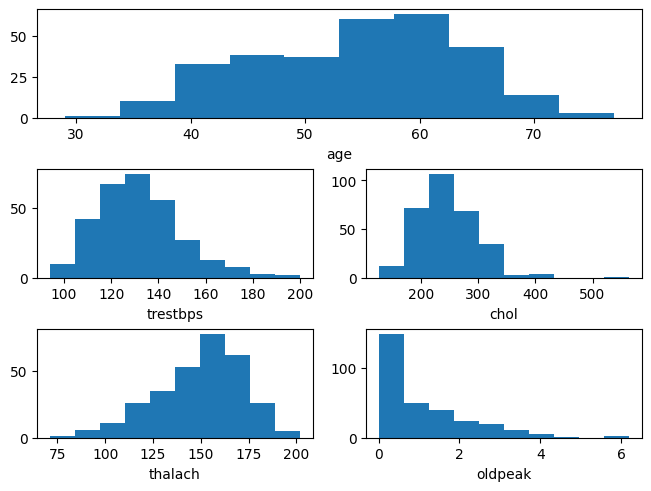

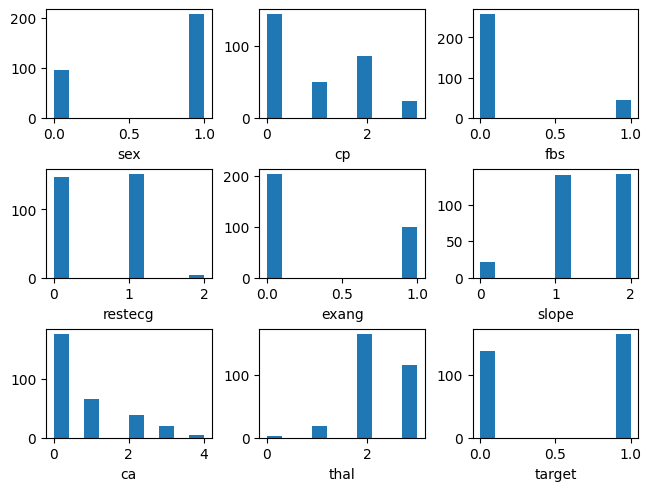

In [103]:
#3. Провести графический и статистический анализ;
from matplotlib import pyplot as plt
import numpy as np
def tiers (x, q25, q50, q75):
    if x <= q25:
        res = 0
    if x > q25 and x <= q50:
        res = 1
    if x > q50 and x <= q75:
        res = 2
    if x > q75:
        res = 3
    return res 
cnt_list = ["age", "trestbps", "chol", "thalach", "oldpeak"]
dscrt_list = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal", "target"]
countable = plt.figure(layout = "constrained")
cnt_mosaic = countable.subplot_mosaic(mosaic = 
                                      [
                                          ["age", "age"],
                                          ["trestbps", "chol"],
                                          ["thalach", "oldpeak"]
                                      ])
for s in cnt_list:
    cnt_mosaic[s].hist(x = df[s]), cnt_mosaic[s].set_xlabel(s)
countable.show()
discrete = plt.figure(layout = "constrained")
dscrt_mosaic = discrete.subplot_mosaic(mosaic=
                                       [
                                           ["sex", "cp", "fbs"],
                                           ["restecg", "exang", "slope"],
                                           ["ca", "thal", "target"]
                                       ])
for s in dscrt_list:
    dscrt_mosaic[s].hist(x = df[s]), dscrt_mosaic[s].set_xlabel(s)
discrete.show()
cnt_describe = df.loc[:, cnt_list].describe()
cmpt = df.copy()
for s in cnt_list:
    cmpt[s] = cmpt[s].apply(lambda x: tiers(x, cnt_describe.loc["25%", s], 
                                            cnt_describe.loc["50%", s],
                                            cnt_describe.loc["75%", s],))
print(cmpt.corr().sort_values(by="target"))
neg = cmpt.loc[:, ["exang", "oldpeak", "ca", "thal", "sex", "age", "trestbps", "chol", "fbs", "restecg", "target"]].copy()
pos = cmpt.loc[:, ["cp", "slope", "thalach", "target"]].copy()
cmpt = cmpt.drop(columns=["sex", "age", "trestbps", "chol", "fbs", "restecg", "ca", "cp", "thalach"])
cmpt

выводы:
1. В будущем хочется делать A/B - тесты и получать p-values для них, а также заниматься построением решающего дерева(бинарная классификация), чтобы больше понимать о статистической зависимости таргет-фичи с базовыми. Поскольку таргет - фича у нас счетная случайная величина, хочется преобразовать дискретные в счетные. При графическом анализе стало понятно что большая часть распределений дискретных случайных величин - распределения long-tail вида с ненулевой симметрией, а потому просто разделение на >, < средней сработает слабо. Можно было бы порезать хвосты распределений, но после чистки датафрейм стал пустой и делать его более пустым не хотелось бы. Поэтому было принято решение о разбиении на tiers по квантилям, чтобы получать более детальную информацию и более точные A/B тесты.
2. После этой процедуры все базовые фичи стали счетными, а потому принято решение посчитать кросс-корреляционную матрицу и по возможности отмести базовые фичи, слабо коррелирующие с таргет фичей. Это оказались : trestbps, chol, fbs, restecg 
3. Отфильтруем значения которые не обладают значительной ассиметрией по функции gropby(...) - отсутствует выраженный пик. Это оказались: ca, resteg, thalach, cp.

In [ ]:
#4.	Выдвинуть несколько гипотез и провести соответствующие статистические тесты;
# большое замечание:
# Воспользуемся теоремой Байеса и теоремой полной вероятности(получим все равно матрицу Маркова)
# target = t, base_metric = bm
# P(t = 1) = sum P(t = 1| bm = i)P(bm = i)
# P(t = 0) = sum P(t = 0| bm = i)P(bm = i)
# P(t = j| bm = i) - элемент матрицы Маркова, и он же условная вероятность
# при этом возникает естественная структура для проведения статистического теста
# Пример - если: 
# H0 : t = 0 при bm = 0 
# H1 : t = 1 при bm = 1
# _________________________________
# P(t = 0| bm = 0)|P(t = 0| bm = 1)
# ________________|________________
# P(t = 1| bm = 0)|P(t = 1| bm = 1)
# ________________|________________
# P(t = 0| bm = 0) - приняли гипотезу Н0 при правильном предположении
# P(t = 0| bm = 1) - приняли гипотезу Н0 при ложном предположении (ошибка 1 рода)
# P(t = 1| bm = 0) - приняли гипотезу Н1 при ложном предположении
# P(t = 1| bm = 1) - приняли гипотезу Н1 при правильном предположении
# для того, чтобы результаты тестов были статистически значимы - нужны соответствующие p-value и мощность, 
# которые можно достать использую bootstraping

4.	Выдвинуть несколько гипотез и провести соответствующие статистические тесты;
большое замечание:
Воспользуемся теоремой Байеса и теоремой полной вероятности(получим все равно матрицу Маркова)
target = t, base_metric = bm
P(t = 1) = sum P(t = 1| bm = i)P(bm = i)
P(t = 0) = sum P(t = 0| bm = i)P(bm = i)
P(t = j| bm = i) - элемент матрицы Маркова, и он же условная вероятность
при этом возникает естественная структура для проведения статистического теста
Пример - если: 
H0 : t = 0 при bm = 0 
H1 : t = 1 при bm = 1
_________________________________
P(t = 0| bm = 0)|P(t = 0| bm = 1)
________________|________________
P(t = 1| bm = 0)|P(t = 1| bm = 1)
________________|________________
P(t = 0| bm = 0) - приняли гипотезу Н0 при правильном предположении
P(t = 0| bm = 1) - приняли гипотезу Н0 при ложном предположении (ошибка 1 рода)
P(t = 1| bm = 0) - приняли гипотезу Н1 при ложном предположении
P(t = 1| bm = 1) - приняли гипотезу Н1 при правильном предположении
для того, чтобы результаты тестов были статистически значимы - нужны соответствующие p-value и мощность, 
которые можно достать использую bootstraping

In [144]:
#4.	Выдвинуть несколько гипотез и провести соответствующие статистические тесты;
#тест для exang
samples = 1000
markov = [[0.0, 0.0, 0.0, 0.0] for i in range(0, samples)]
for i in range(0, samples):
    sample = cmpt.sample(n = 150, replace=True)
    res = sample.groupby(by=["exang"]).sum()["target"] / sample.groupby(by=["exang"]).count()["target"]
    markov[i] = [res[0], 1.0 - res[0], res[1], 1.0 - res[1]]
markov_np = np.array(markov)
print("exang")
print(markov_np[:, 0].mean(), markov_np[:, 0].std())
print(markov_np[:, 1].mean(), markov_np[:, 1].std())
print(markov_np[:, 2].mean(), markov_np[:, 2].std())
print(markov_np[:, 3].mean(), markov_np[:, 3].std())

exang
0.6960249331652433 0.045110605576448325
0.3039750668347567 0.045110605576448325
0.23177079173207915 0.06067546164019962
0.7682292082679207 0.06067546164019962


In [143]:
#тест для slope
samples = 1000
markov_1 = [[0.0, 0.0, 0.0, 0.0] for i in range(0, samples)]
markov_2 = [[0.0, 0.0, 0.0, 0.0] for i in range(0, samples)]
for i in range(0, samples):
    sample = cmpt.sample(n = 150, replace=True)
    res = sample.groupby(by=["slope"]).sum()["target"] / sample.groupby(by=["slope"]).count()["target"]
    markov_1[i] = [res[2], 1.0 - res[2], res[1], 1.0 - res[1]]
    markov_2[i] = [res[2], 1.0 - res[2], res[0], 1.0 - res[0]]
markov_1_np = np.array(markov_1)
markov_2_np = np.array(markov_2)
print("slope21")
print(markov_1_np[:, 0].mean(), markov_1_np[:, 0].std())
print(markov_1_np[:, 1].mean(), markov_1_np[:, 1].std())
print(markov_1_np[:, 2].mean(), markov_1_np[:, 2].std())
print(markov_1_np[:, 3].mean(), markov_1_np[:, 3].std())
print("slope20")
print(markov_2_np[:, 0].mean(), markov_2_np[:, 0].std())
print(markov_2_np[:, 1].mean(), markov_2_np[:, 1].std())
print(markov_2_np[:, 2].mean(), markov_2_np[:, 2].std())
print(markov_2_np[:, 3].mean(), markov_2_np[:, 3].std())

slope21
0.7515536904703063 0.04825205659281232
0.24844630952969385 0.04825205659281232
0.3499023043148852 0.05785935783613513
0.6500976956851148 0.05785935783613513
slope20
0.7515536904703063 0.04825205659281232
0.24844630952969385 0.04825205659281232
0.4273425715796072 0.16614758709114885
0.5726574284203928 0.16614758709114885


In [156]:
# тест thal
samples = 1000
markov_1 = [[0.0, 0.0, 0.0, 0.0] for i in range(0, samples)]
markov_2 = [[0.0, 0.0, 0.0, 0.0] for i in range(0, samples)]
markov_3 = [[0.0, 0.0, 0.0, 0.0] for i in range(0, samples)]
for i in range(0, samples):
    sample = cmpt.sample(n = 150, replace=True)
    res = sample.groupby(by=["thal"]).sum()["target"] / sample.groupby(by=["thal"]).count()["target"]
    try:
        markov_1[i] = [res[2], 1.0 - res[2], res[1], 1.0 - res[1]]
    except Exception:
        continue
    try:
        markov_2[i] = [res[2], 1.0 - res[2], res[0], 1.0 - res[0]]
    except Exception:
        continue
    try:
        markov_3[i] = [res[2], 1.0 - res[2], res[3], 1.0 - res[3]]
    except Exception:
        continue
markov_1_np = np.array(markov_1)
markov_2_np = np.array(markov_2)
markov_3_np = np.array(markov_3)
print("thal21")
print(markov_1_np[:, 0].mean(), markov_1_np[:, 0].std())
print(markov_1_np[:, 1].mean(), markov_1_np[:, 1].std())
print(markov_1_np[:, 2].mean(), markov_1_np[:, 2].std())
print(markov_1_np[:, 3].mean(), markov_1_np[:, 3].std())
print("thal20")
print(markov_2_np[:, 0].mean(), markov_2_np[:, 0].std())
print(markov_2_np[:, 1].mean(), markov_2_np[:, 1].std())
print(markov_2_np[:, 2].mean(), markov_2_np[:, 2].std())
print(markov_2_np[:, 3].mean(), markov_2_np[:, 3].std())
print("thal23")
print(markov_3_np[:, 0].mean(), markov_3_np[:, 0].std())
print(markov_3_np[:, 1].mean(), markov_3_np[:, 1].std())
print(markov_3_np[:, 2].mean(), markov_3_np[:, 2].std())
print(markov_3_np[:, 3].mean(), markov_3_np[:, 3].std())

thal21
0.7805327313888049 0.04601131229332866
0.21946726861119506 0.046011312293328666
0.33542070230680904 0.16816187376937577
0.6645792976931909 0.16816187376937577
thal20
0.4897098568559833 0.37956556558871424
0.13729014314401672 0.11232749158650794
0.31193333333333334 0.42934942516426977
0.31506666666666666 0.43070832615845994
thal23
0.4897098568559833 0.37956556558871424
0.13729014314401672 0.11232749158650794
0.15035288637675093 0.12382305213000488
0.476647113623249 0.37018899902851476


In [159]:
# тест для oldpeak
samples = 1000
markov_1 = [[0.0, 0.0, 0.0, 0.0] for i in range(0, samples)]
markov_2 = [[0.0, 0.0, 0.0, 0.0] for i in range(0, samples)]
markov_3 = [[0.0, 0.0, 0.0, 0.0] for i in range(0, samples)]
for i in range(0, samples):
    sample = cmpt.sample(n = 150, replace=True)
    res = sample.groupby(by=["oldpeak"]).sum()["target"] / sample.groupby(by=["oldpeak"]).count()["target"]
    try:
        markov_1[i] = [res[1], 1.0 - res[1], res[0], 1.0 - res[0]]
    except Exception:
        continue
    try:
        markov_2[i] = [res[1], 1.0 - res[1], res[2], 1.0 - res[2]]
    except Exception:
        continue
    try:
        markov_3[i] = [res[1], 1.0 - res[1], res[3], 1.0 - res[3]]
    except Exception:
        continue
markov_1_np = np.array(markov_1)
markov_2_np = np.array(markov_2)
markov_3_np = np.array(markov_3)
print("oldpeak10")
print(markov_1_np[:, 0].mean(), markov_1_np[:, 0].std())
print(markov_1_np[:, 1].mean(), markov_1_np[:, 1].std())
print(markov_1_np[:, 2].mean(), markov_1_np[:, 2].std())
print(markov_1_np[:, 3].mean(), markov_1_np[:, 3].std())
print("oldpeak12")
print(markov_2_np[:, 0].mean(), markov_2_np[:, 0].std())
print(markov_2_np[:, 1].mean(), markov_2_np[:, 1].std())
print(markov_2_np[:, 2].mean(), markov_2_np[:, 2].std())
print(markov_2_np[:, 3].mean(), markov_2_np[:, 3].std())
print("oldpeak13")
print(markov_3_np[:, 0].mean(), markov_3_np[:, 0].std())
print(markov_3_np[:, 1].mean(), markov_3_np[:, 1].std())
print(markov_3_np[:, 2].mean(), markov_3_np[:, 2].std())
print(markov_3_np[:, 3].mean(), markov_3_np[:, 3].std())

oldpeak10
0.7019120572354575 0.07902697534383595
0.29808794276454254 0.07902697534383595
0.7454261235851857 0.06184516040772584
0.2545738764148144 0.06184516040772584
oldpeak12
0.7019120572354575 0.07902697534383595
0.29808794276454254 0.07902697534383595
0.489893150308136 0.08751277540787838
0.510106849691864 0.08751277540787838
oldpeak13
0.7019120572354575 0.07902697534383595
0.29808794276454254 0.07902697534383595
0.19016271242864616 0.06365044252458259
0.809837287571354 0.06365044252458259


In [161]:
# еще один тест для olpdeak
samples = 1000
markov = [[0.0, 0.0, 0.0, 0.0] for i in range(0, samples)]
for i in range(0, samples):
    sample = cmpt.sample(n = 150, replace=True)
    res = sample.groupby(by=["oldpeak"]).sum()["target"] / sample.groupby(by=["oldpeak"]).count()["target"]
    p = res[0] * sample.groupby(by=["oldpeak"]).count().loc[0, "target"] / 150 + res[2] * sample.groupby(by=["oldpeak"]).count().loc[2, "target"] / 150
    q = res[1] * sample.groupby(by=["oldpeak"]).count().loc[1, "target"] / 150 + res[3] * sample.groupby(by=["oldpeak"]).count().loc[3, "target"] / 150
    markov[i] = [p, 1.0 - p, q, 1.0 - q]
markov_np = np.array(markov)
print("oldpeak")
print(markov_np[:, 0].mean(), markov_np[:, 0].std())
print(markov_np[:, 1].mean(), markov_np[:, 1].std())
print(markov_np[:, 2].mean(), markov_np[:, 2].std())
print(markov_np[:, 3].mean(), markov_np[:, 3].std())

oldpeak
0.34408000000000005 0.03845080897863023
0.6559200000000001 0.03845080897863023
0.19583333333333333 0.03279998306232625
0.8041666666666666 0.03279998306232625


выводы тестов:

oldpeak -> H0: oldpeak = odd => target = 0, p_value = 0.80
exang -> H0: exang = 1 => target = 0, p_value = 0.77
slope -> H0: slope = 2 => target = 1, p_value = 0.75
thal -> нет гипотезы с достаточноной p_value


In [170]:
#5. Построить модель бинарной классификации;
#замечание: табличная форма бинарного дерева
def h_slope(x):
    res = 0
    if x == 2:
        res = 1
    else:
        res = 0
    return res

def h_oldpeak(x):
    res = 0
    if x == 1 or x == 3:
        res = 0
    if x == 2 or x == 0:
        res = 1 
    return res
tst = cmpt.drop(columns = "thal")
tst["slope"] = tst["slope"].apply(h_slope)
tst["oldpeak"] = tst["oldpeak"].apply(h_oldpeak)
tst.groupby(by=["oldpeak", "exang", "slope"]).sum()


target
oldpeak exang slope        
0       0     0          27
              1          24
        1     0           5
              1           3
1       0     0          21
              1          69
        1     0           5
              1          10

mean score of binary classification
0.7467933333333333 0.029938187431216786
importances
oldpeak: 0.09142339467612716 0.06875914005005726
exang: 0.5584554406944613 0.21418045612007924
slope: 0.3501211646294115 0.2154301724029618
mean score of binary classification
0.7354733333333332 0.03053592347092556
importances
exang: 0.6017412321268304 0.23230551061014382
slope: 0.3982587678731696 0.23230551061014382


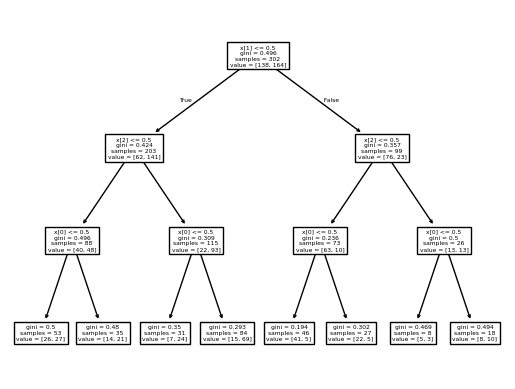

In [187]:
#замечание: зафитим sklearn-ом бинарное дерево
from sklearn import tree
binary = tree.DecisionTreeClassifier()
train = tst.loc[:, ["oldpeak", "exang", "slope"]].to_numpy()
target = tst["target"].to_numpy()
binary = binary.fit(train, target)
tree.plot_tree(binary)
#6.	Вывести важность признаков в графическом представлении.
# забутстрапим метрики
samples = 1000
scores = [0.0 for i in range(0, samples)]
importances = [[0.0, 0.0, 0.0] for i in range(0, samples)]
for i in range(0, samples):
    sample = tst.sample(n=150, replace= True)
    train = sample.loc[:, ["oldpeak", "exang", "slope"]].to_numpy()
    target = sample["target"].to_numpy()
    binary = binary.fit(train, target)
    scores[i] = binary.score(train, target)
    importances[i] = binary.feature_importances_
scores_np = np.array(scores)
importances_np = np.array(importances)
print("mean score of binary classification")
print(scores_np.mean(), scores_np.std())
print("importances")
print("oldpeak:", importances_np[:, 0].mean(), importances_np[:, 0].std())
print("exang:", importances_np[:, 1].mean(), importances_np[:, 1].std())
print("slope:", importances_np[:, 2].mean(), importances_np[:, 2].std())


mean score of binary classification
0.73824 0.03166231829793897
importances
exang: 0.6074798091766361 0.23633620046846926
slope: 0.39252019082336387 0.2363362004684693


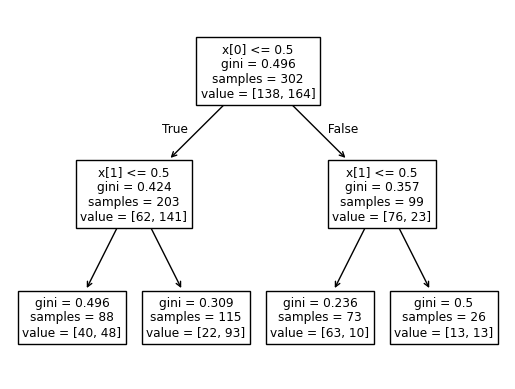

In [188]:
# замечание: важность oldpeak сильно ниже, чем остальных фичей - уберем этот лист
from sklearn import tree
binary = tree.DecisionTreeClassifier()
train = tst.loc[:, ["exang", "slope"]].to_numpy()
target = tst["target"].to_numpy()
binary = binary.fit(train, target)
tree.plot_tree(binary)
samples = 1000
scores = [0.0 for i in range(0, samples)]
importances = [[0.0, 0.0, 0.0] for i in range(0, samples)]
for i in range(0, samples):
    sample = tst.sample(n=150, replace= True)
    train = sample.loc[:, ["exang", "slope"]].to_numpy()
    target = sample["target"].to_numpy()
    binary = binary.fit(train, target)
    scores[i] = binary.score(train, target)
    importances[i] = binary.feature_importances_
scores_np = np.array(scores)
importances_np = np.array(importances)
print("mean score of binary classification")
print(scores_np.mean(), scores_np.std())
print("importances")
print("exang:", importances_np[:, 0].mean(), importances_np[:, 0].std())
print("slope:", importances_np[:, 1].mean(), importances_np[:, 1].std())